<b>Data Description:</b><br>
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.<br><br>
<b>Domain:</b><br>
Object recognition<br><br>
<b>Context:</b>
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.<br><br>
<b>Attribute Information:</b><br>
● All the features are geometric features extracted from the silhouette.<br>
● All are numeric in nature.<br><br>
<b>Learning Outcomes:</b><br>
● Exploratory Data Analysis<br>
● Reduce number dimensions in the dataset with minimal information loss<br>
● Train a model using Principle Components<br><br>
 <b>Objective:</b><br>
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

<p style="color:blue"><b> STEP1: Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm<b></p>

In [1]:
# Import necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

In [2]:
#Library for Data Pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
#sklearn models
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
#Library for Model Evaluation 
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
#Other Libraries
from collections import Counter
from itertools import combinations, product
from scipy import stats
from matplotlib.colors import ListedColormap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


### Define Functions used in this program

In [3]:
# Check Outliers
def find_outlier(data,name):
    """ This Function counts and prints outlier in a data set. 
    lower limit = Q1 - 1.5 * IQR, Upeer limit = Q3 + 1.5 IQR
    Return = None """
    iqr = stats.iqr(data)
    upper_lim = np.percentile(data,75) + (1.5 * iqr)
    lower_lim = np.percentile(data,25) - (1.5 * iqr)
    outlier = []
    for number in data:
        if (number > upper_lim) or (number < lower_lim):
            outlier.append(number)            
    print (' {} = There are total {} ({:0.2f}%) outliers'.format(name,
                                                len(outlier), 
                                                len(outlier)*100/len(data)))

In [5]:
#Read the Dataset in a Dataframe
car_df = pd.read_csv('vehicle-1.csv')

In [6]:
#Check head of dataset
car_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [7]:
#Print Columns, and Shape
print(car_df.columns)
print('')
print('Total Rows = {}'.format(car_df.shape[0]))
print('Total Cols = {}'.format(car_df.shape[1]))

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

Total Rows = 846
Total Cols = 19


In [8]:
car_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

### Observations:

1. We can see some null values.
2. Total columns = 19, out of those 1 dependent and 18 independent
3. A bit in-balanced dataset with twice the cars than bus or van.

In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [10]:
#Check missing values
car_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### Observation:
There are few missing values. We will see how to resolve these missing values. 

<p style="color:blue"><b>missing value treatment </b></p>

In [11]:
#- find features with missing value, print their mean, median and mode
null_cols = []
for cols in car_df.columns:
    if car_df[cols].isnull().sum() == 0:
        continue
    else:
        null_cols.append(cols)
        print('{} : \nMean = {}, \nMedian = {}, \nMode = {} '.format(cols,
                                                              car_df[cols].mean(),
                                                              car_df[cols].median(),
                                                              car_df[cols].mode()))
        print('')

circularity : 
Mean = 44.828775267538646, 
Median = 44.0, 
Mode = 0    43.0
dtype: float64 

distance_circularity : 
Mean = 82.1104513064133, 
Median = 80.0, 
Mode = 0    66.0
dtype: float64 

radius_ratio : 
Mean = 168.88809523809525, 
Median = 167.0, 
Mode = 0    197.0
dtype: float64 

pr.axis_aspect_ratio : 
Mean = 61.67890995260664, 
Median = 61.0, 
Mode = 0    64.0
dtype: float64 

scatter_ratio : 
Mean = 168.901775147929, 
Median = 157.0, 
Mode = 0    150.0
dtype: float64 

elongatedness : 
Mean = 40.933727810650886, 
Median = 43.0, 
Mode = 0    31.0
1    45.0
dtype: float64 

pr.axis_rectangularity : 
Mean = 20.582443653618032, 
Median = 20.0, 
Mode = 0    19.0
dtype: float64 

scaled_variance : 
Mean = 188.63107947805457, 
Median = 179.0, 
Mode = 0    170.0
dtype: float64 

scaled_variance.1 : 
Mean = 439.49407582938386, 
Median = 363.5, 
Mode = 0    327.0
1    330.0
2    333.0
dtype: float64 

scaled_radius_of_gyration : 
Mean = 174.70971563981044, 
Median = 173.5, 
Mode = 0  

In [12]:
#check the distribution of columns with missing values
#sns.pairplot(car_df[null_cols],diag_kind='kde')

In [13]:
# Impute missing values with 'median' - I have chosen median because distribution is not normal (as we can see above)
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
imputer = imputer.fit(car_df[null_cols])
car_df[null_cols] = imputer.transform(car_df[null_cols] )


<p style="color:blue"><b>Outlier Treatment </b></p>

In [14]:
#Find outliers
i=-1
for cols in car_df.columns:
    i = i + 1   
    if car_df[cols].dtype != 'object':
        find_outlier(car_df[cols],car_df.columns[i])

 compactness = There are total 0 (0.00%) outliers
 circularity = There are total 0 (0.00%) outliers
 distance_circularity = There are total 0 (0.00%) outliers
 radius_ratio = There are total 3 (0.35%) outliers
 pr.axis_aspect_ratio = There are total 8 (0.95%) outliers
 max.length_aspect_ratio = There are total 13 (1.54%) outliers
 scatter_ratio = There are total 0 (0.00%) outliers
 elongatedness = There are total 0 (0.00%) outliers
 pr.axis_rectangularity = There are total 0 (0.00%) outliers
 max.length_rectangularity = There are total 0 (0.00%) outliers
 scaled_variance = There are total 1 (0.12%) outliers
 scaled_variance.1 = There are total 2 (0.24%) outliers
 scaled_radius_of_gyration = There are total 0 (0.00%) outliers
 scaled_radius_of_gyration.1 = There are total 15 (1.77%) outliers
 skewness_about = There are total 12 (1.42%) outliers
 skewness_about.1 = There are total 1 (0.12%) outliers
 skewness_about.2 = There are total 0 (0.00%) outliers
 hollows_ratio = There are total 0

### Observation: 
    There are Negligible outliers, so I have decided  to keep them as they are

In [15]:
#Check head after missing value treatment
car_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [16]:
#Check if there are any missing values left
car_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### Observation:
There are no missing values anymore. 

<p style="color:blue"><b> Exploratory Data Analysis <b></p>

In [17]:
for cols in car_df.columns:
    print('                       '+str(cols))
    print(car_df.groupby('class')[cols].describe())
    print('------------------------------------------------------------------------- ')


                       compactness
       count       mean       std   min   25%   50%    75%    max
class                                                            
bus    218.0  91.591743  8.618024  78.0  85.0  89.0   98.0  114.0
car    429.0  96.184149  8.732319  73.0  89.0  97.0  103.0  119.0
van    199.0  90.562814  3.872308  82.0  88.0  90.0   93.0  100.0
------------------------------------------------------------------------- 
                       circularity
       count       mean       std   min   25%   50%   75%   max
class                                                          
bus    218.0  44.963303  4.893194  35.0  42.0  44.0  47.0  58.0
car    429.0  46.030303  7.031738  33.0  39.0  46.0  53.0  59.0
van    199.0  42.070352  4.083111  34.0  39.0  42.0  46.0  50.0
------------------------------------------------------------------------- 
                       distance_circularity
       count       mean        std   min   25%   50%    75%    max
class              

### Observation:
I can see the variation in mean for different classes (bus, van and car).However, it is difficult to say how to interpret these feature variation between classes. This is partly due to my lack of domain understanding. 

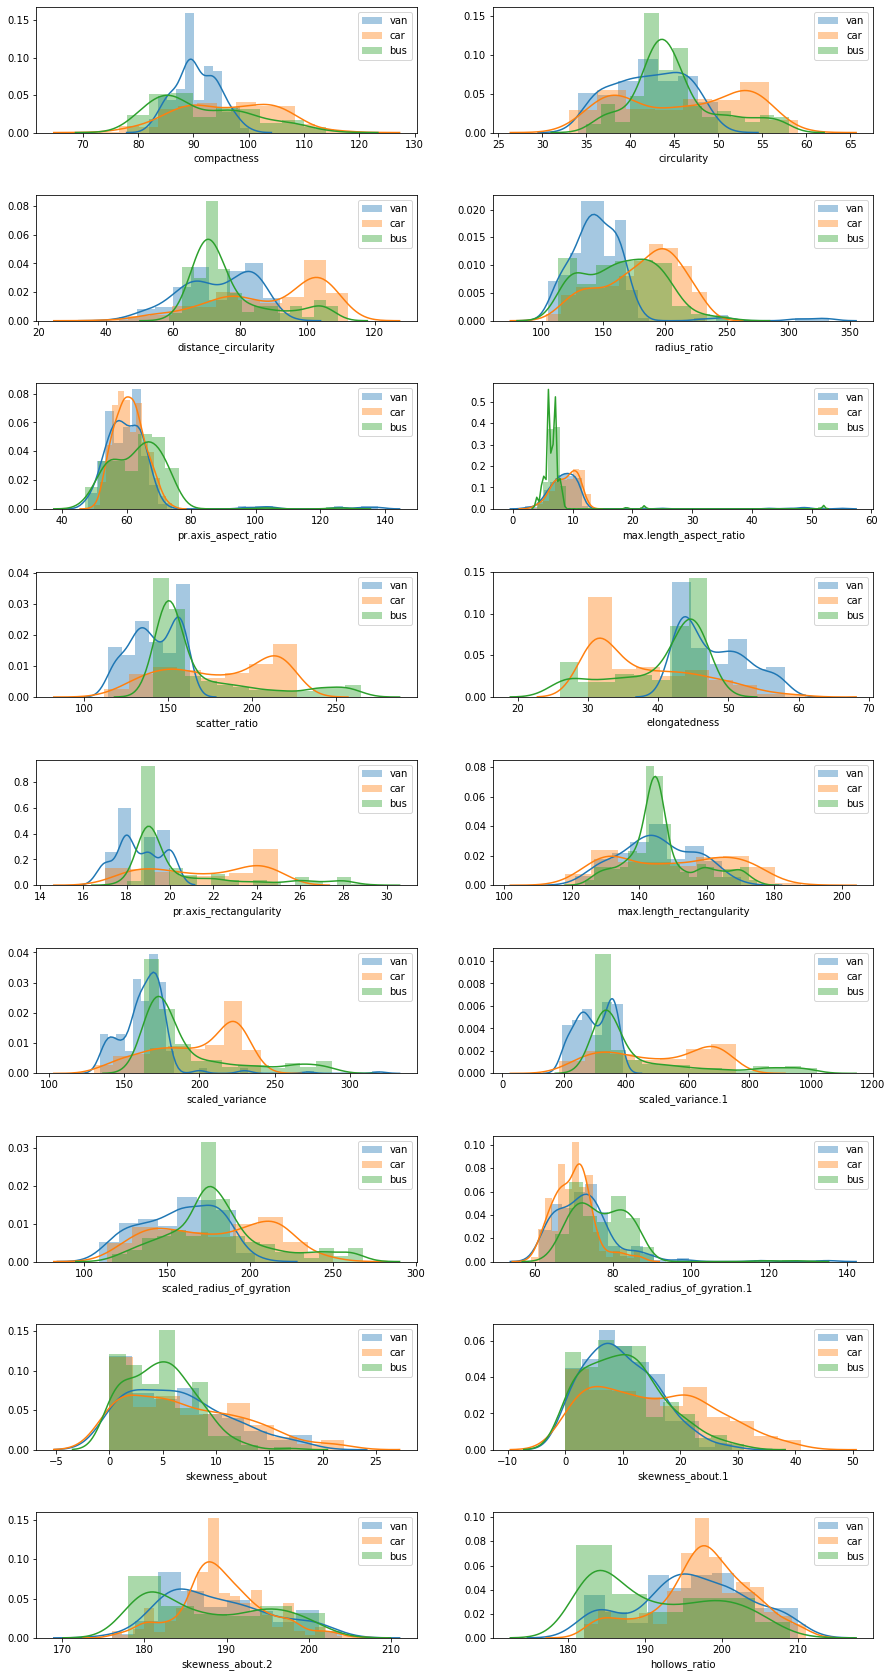

In [18]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(9, 2, figsize=(15,30))
f.subplots_adjust(hspace=.5)
all_cols = car_df.columns
idx = 0
fg = sns.FacetGrid(car_df, hue='class',legend_out=True)
for row in range(0,9):
    for col in range(0,2):
        if idx < 18:
            fg.map(sns.distplot, all_cols[idx], ax=ax[row,col])
            ax[row,col].legend()
            idx += 1
        else:
            ax[row,col].set_visible(False) 

plt.tight_layout(pad=6.0) 

fg.add_legend()
plt.close(2)
plt.show()


### Observation:
1. Distribution is not normal for most of the attributes. 
2. For most attributes, distribution is with long tail (thus high standard deviation, as see in previous step). 
3. For most attributes, distribution is skewed. 

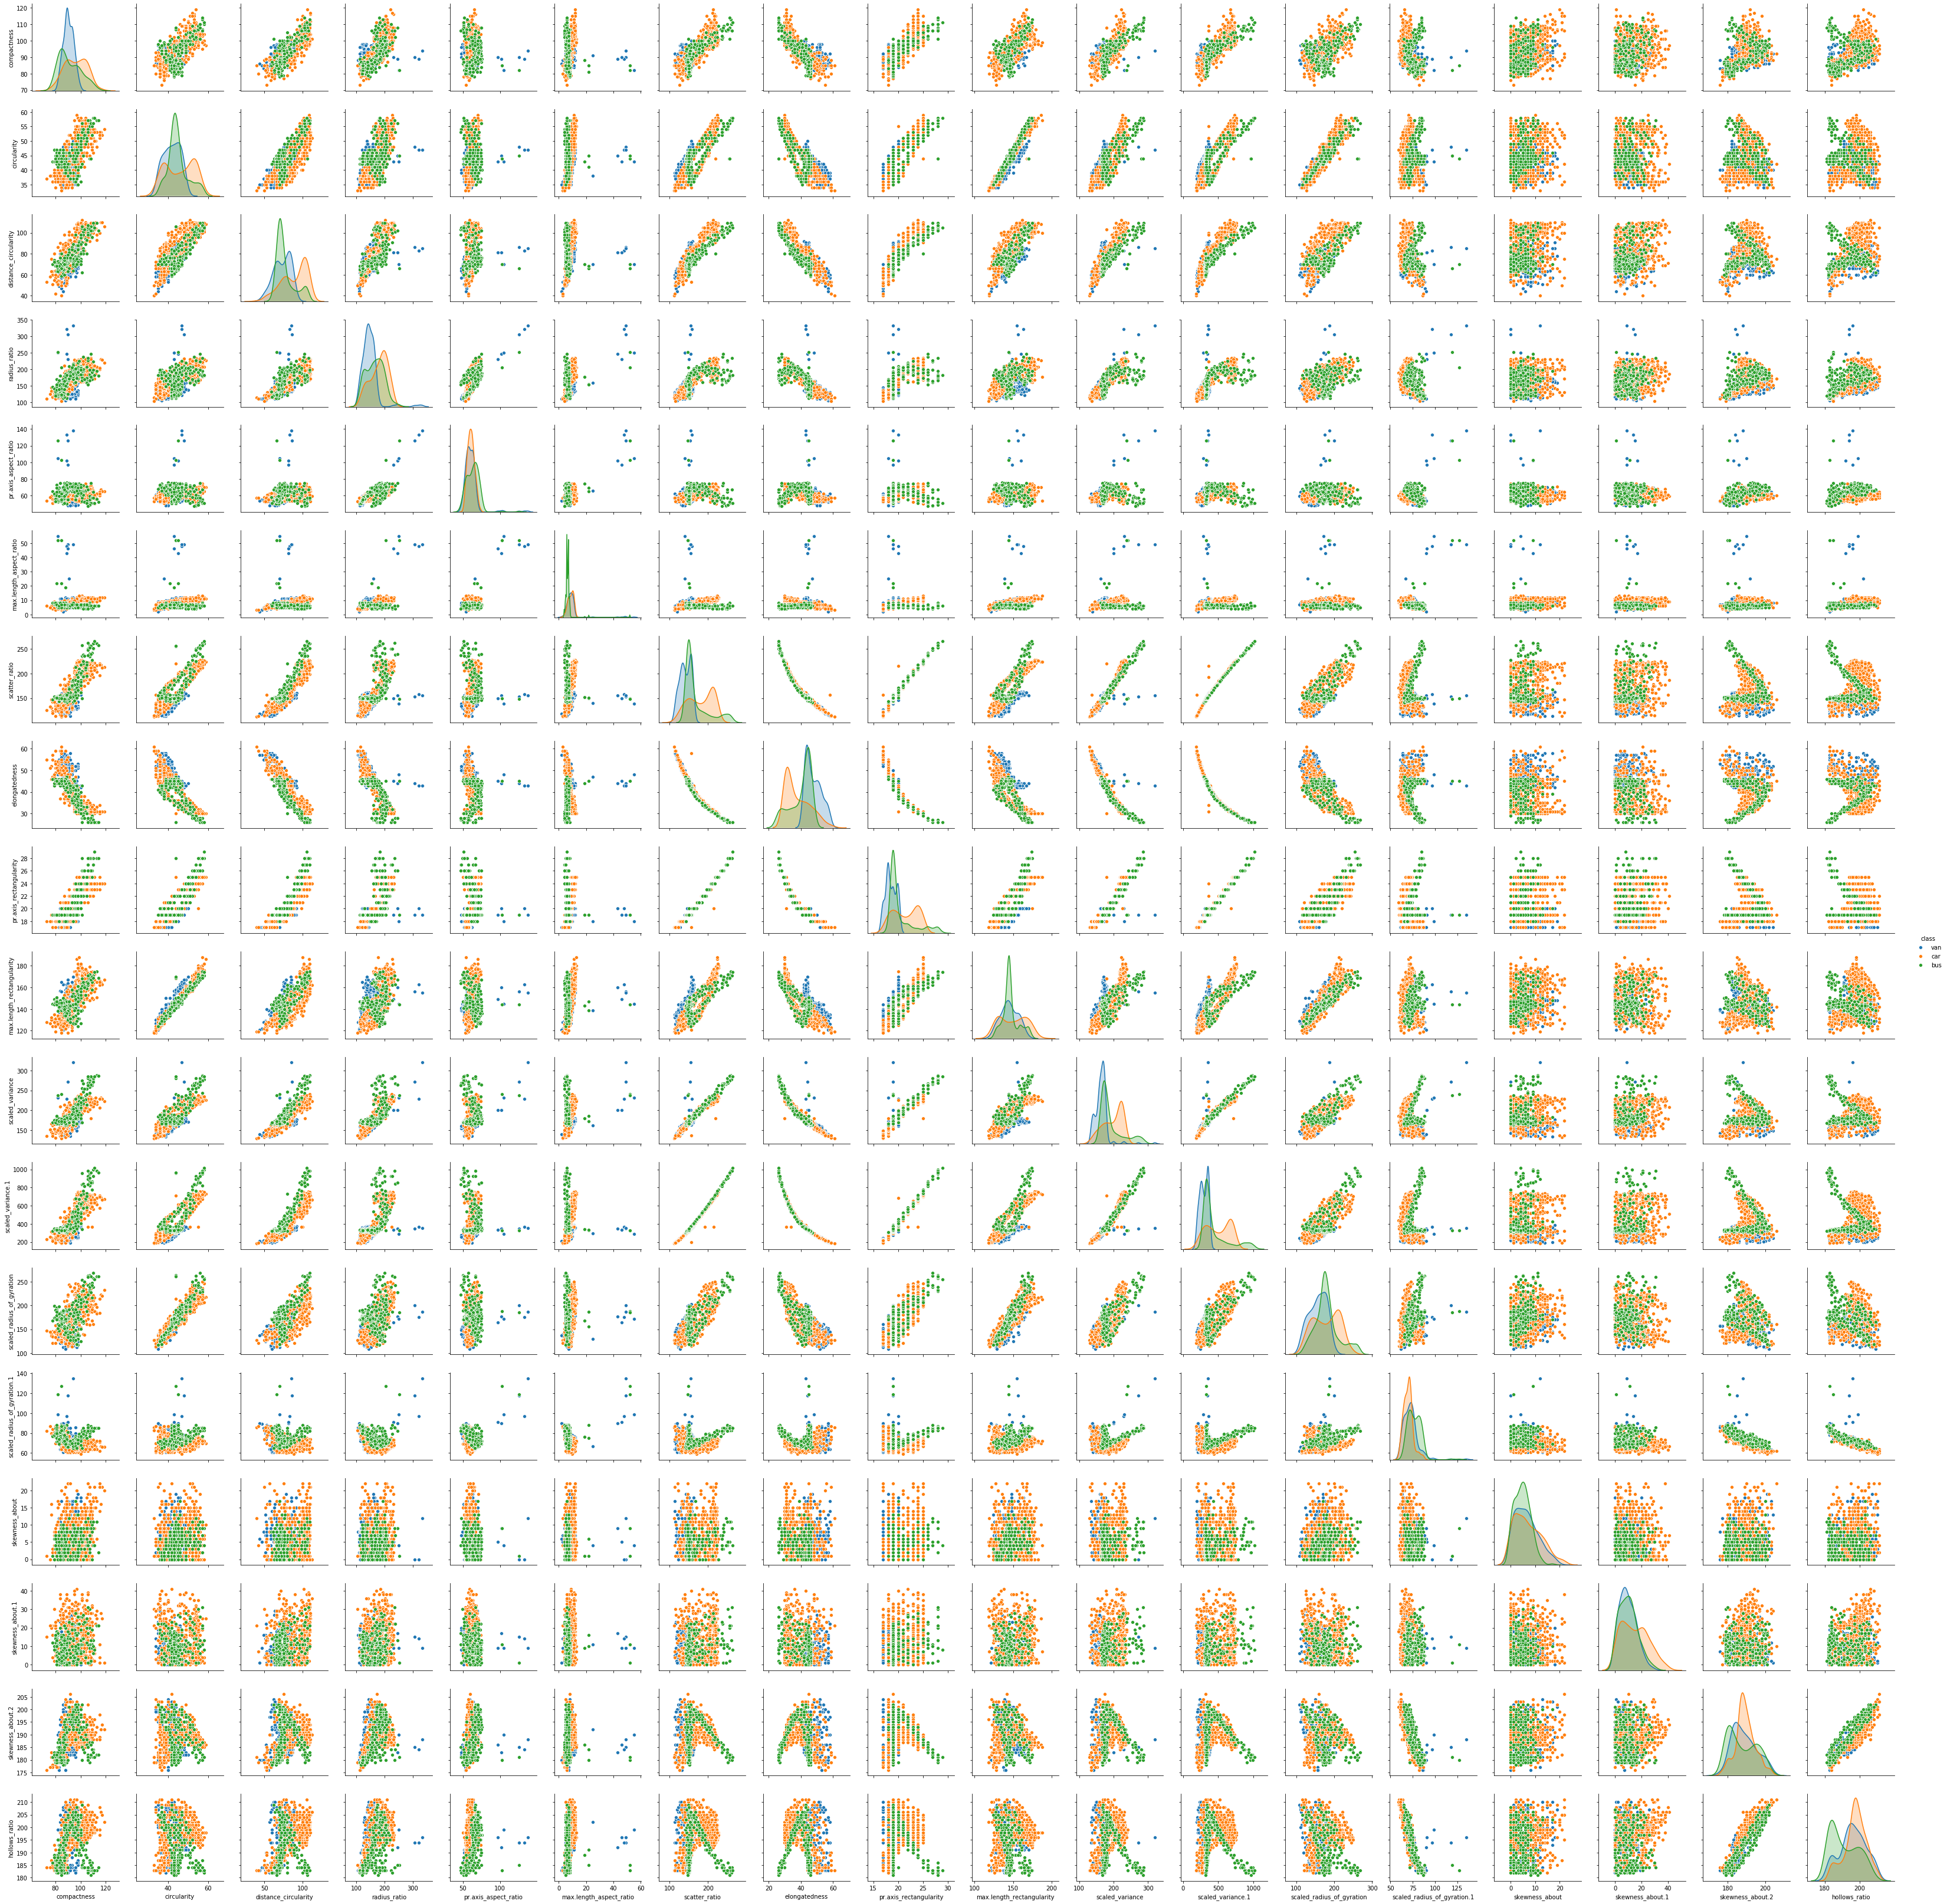

In [19]:
# now that we have a univariate distribution done, we can go ahead and determine the pairwise relationships in the dataset.
# we use the sns.pairplpot. Analyze the distrbutions.
# also, we add hue to see these distrbutions with the class col
sns.pairplot(car_df, hue="class",diag_kind='kde')

### Observation:
1. Many columns are showing very strong correlation. 

In [20]:
#LabelEncoder to encode class. I am doing this to see the correlation of class with other independent variables. 
label_encoder = LabelEncoder()
car_df['class_new'] = label_encoder.fit_transform(car_df['class'])
car_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  class_new  
0             187.0            197   van          2  
1             189.0            199   van          2  
2             188.0            196   car          1  
3             199.0            207   van          2  
4             180.0            183   bus          0

In [21]:
#Create X (independent) and y (dependent) datasets
X = car_df.drop(['class','class_new'],axis=1)
y = car_df[['class_new']]

In [22]:
#Scale the data using Standard Scaler
std_columns = X.columns
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X))
X_scaled.columns = std_columns
X_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

<p style="color:blue"><b> STEP2: Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all 
attributes have to be a part of the analysis and why<b></p>


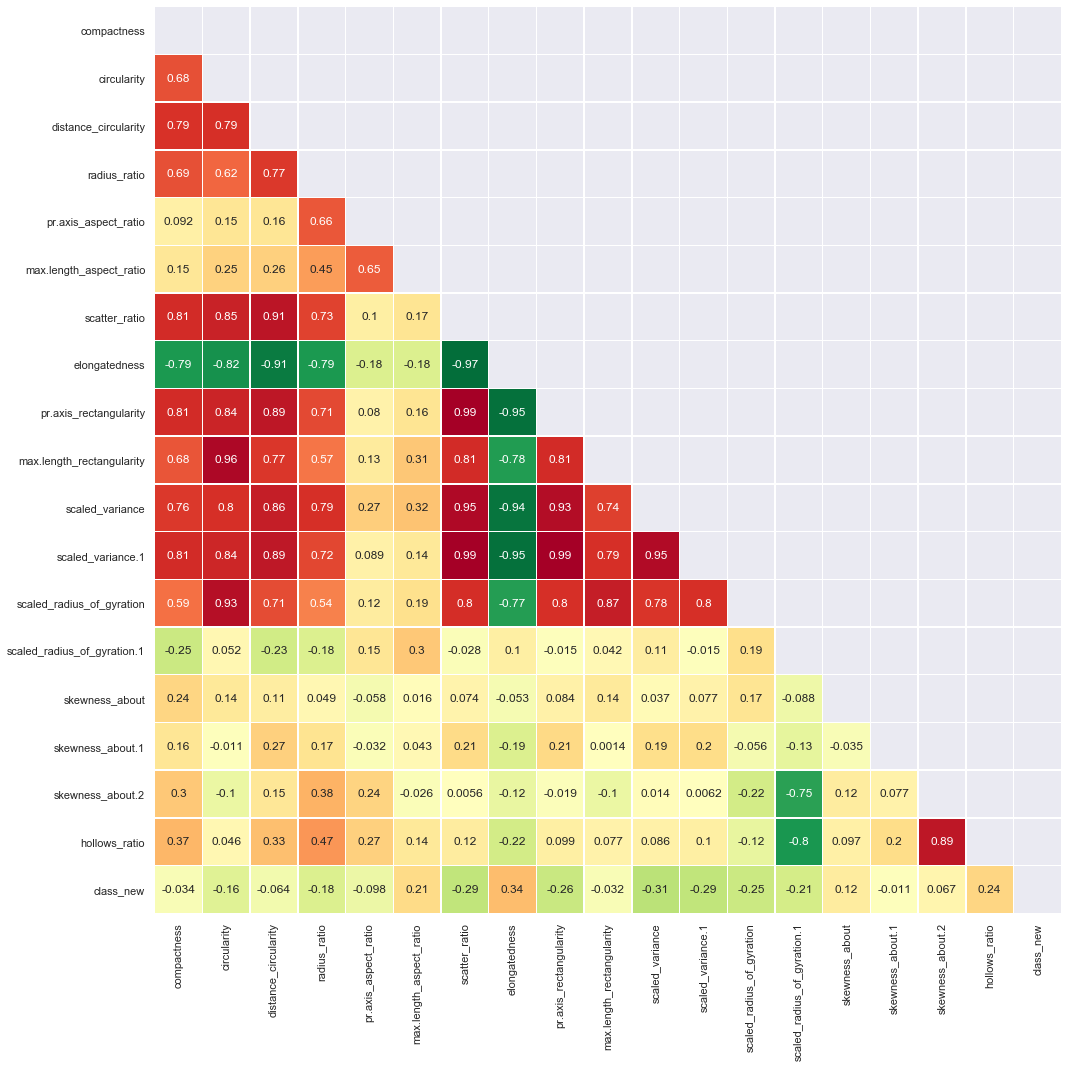

In [23]:
#Check the correlation of independent variables
sns.set(font_scale=1)
corr = car_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr,
            annot=True,
            linewidths=.5,
            cmap = 'RdYlGn_r',
            center=0,
            mask = mask,
            cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.autoscale(tight=True)
plt.tight_layout()
plt.show()

### Observation:
1. I can see strong correlation between many attributes. 

In [24]:
#Check the Variance Inflation Factors for attributes.
X = add_constant(X)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)


C:\Users\spshu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                          19867.071823
compactness                        5.414434
circularity                       30.069032
distance_circularity              13.048848
radius_ratio                      30.973360
pr.axis_aspect_ratio              12.886795
max.length_aspect_ratio            3.882883
scatter_ratio                    246.658060
elongatedness                     40.150735
pr.axis_rectangularity            63.607215
max.length_rectangularity         19.322639
scaled_variance                   36.207087
scaled_variance.1                118.211372
scaled_radius_of_gyration         10.622175
scaled_radius_of_gyration.1       10.531311
skewness_about                     1.303510
skewness_about.1                   1.566601
skewness_about.2                  12.380874
hollows_ratio                     15.509200
dtype: float64

### Observation:
There appears to be high multicollinearity as VIF is as great as 246. Many columns are showing VIF > 10 (implying the multicollinerity)

In [25]:
#Drop the constant added for VIF
X.drop(['const'],axis=1,inplace=True)

<p style="color:blue"><b> STEP3: Split the data into train and test <b></p>

In [26]:
X_scaled_train, X_scaled_test, y_train, y_test =train_test_split(X, y, test_size=.30, random_state=10)

X_scaled_train.shape, X_scaled_test.shape

((592, 18), (254, 18))

In [27]:
#Scaling the X_train and X_test seperately to minimize the data loss. 
std_columns = X.columns
X_scaled_train = pd.DataFrame(StandardScaler().fit_transform(X_scaled_train))
X_scaled_test = pd.DataFrame(StandardScaler().fit_transform(X_scaled_test))
X_scaled.columns = std_columns

<p style="color:blue"><b> STEP4: Train a Support vector machine using the train set and get the accuracy on the test set<b></p>


In [28]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='poly', gamma= 1)
svc_model.fit(X_scaled_train, y_train['class_new'].ravel())
y_predict = svc_model.predict(X_scaled_test)

In [29]:
#FInd Hyperparameteres for SVC Classifier
C_value = np.arange(.1,1,.1)
gamma_value = np.arange(1,20,1)
kernel_value = ['linear','poly','rbf','sigmoid']
hyper_parms = dict(C=C_value, kernel=kernel_value, gamma = gamma_value)
clf = GridSearchCV(SVC(),hyper_parms,cv=10,verbose=True,n_jobs=-1)
tuned_model = clf.fit(X_scaled,y['class_new'].ravel())

Fitting 10 folds for each of 684 candidates, totalling 6840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 331 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 831 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 1531 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 2431 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3531 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4831 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6331 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 6833 out of 6840 | elapsed:  2.8min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 6840 out of 6840 | elapsed:  2.8min finished
C:\Users\spshu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes 

In [30]:
# View best hyperparameters
print('Best C:', tuned_model.best_estimator_.get_params()['C'])
print('Best Kernel:', tuned_model.best_estimator_.get_params()['kernel'])
print('Best gamma:', tuned_model.best_estimator_.get_params()['gamma'])

Best C: 0.1
Best Kernel: poly
Best gamma: 1


<p style="color:blue"><b> STEP5: Perform K-fold cross validation and get the cross validation score of the model<b></p>


In [31]:
#Kfold cross validation score - using hyperparameters from previous step
score = cross_val_score(SVC(C=.1,kernel = 'poly',gamma=1),X_scaled_train,y_train['class_new'].ravel(),
                        scoring = 'accuracy', cv=10)


In [32]:
#Print scores
score

array([0.96721311, 0.95      , 0.91666667, 0.95      , 0.91525424,
       0.94915254, 0.94915254, 0.94827586, 0.89655172, 0.98275862])

In [33]:
dt_accuracy = accuracy_score(y_test,y_predict)
train_accuracy = svc_model.score(X_scaled_train, y_train)
dt_f1score = f1_score(y_test,y_predict, average='weighted')
dt_recall = recall_score(y_test, y_predict, average='weighted')
dt_precision = precision_score(y_test, y_predict, average='weighted')
method = 'before PCA 18 components'
final_result = pd.DataFrame({'Method':method,
                                    'Train Accuracy': train_accuracy,
                                    'Test Accuracy':dt_accuracy,
                                    'F1-Score':dt_f1score,
                                    'Recall': dt_recall,
                                    'precision': dt_precision,
                                    '10 fold Mean score': score.mean(),
                                    '10 Fold STD ': score.std()
                                   }, index=[0])

In [34]:
final_result

Method  Train Accuracy  Test Accuracy  F1-Score   Recall  \
0  before PCA 18 components             1.0        0.92126  0.921536  0.92126   

   precision  10 fold Mean score  10 Fold STD   
0   0.923746            0.942503      0.024468

<p style="color:blue"><b> STEP6: Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data<b></p>

In [35]:
pca = PCA(n_components=18)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
#print eigen values and eigen vectors
print('Eigen values')
print(pca.explained_variance_)
print('')
print('Eigen vectors')
print(pca.components_)

Eigen values
[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]

Eigen vectors
[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-0

In [37]:
#Print variance explained by various components
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


In [38]:
# the "cumulative variance explained" analysis 
tot = sum(pca.explained_variance_)

var_exp = [( i /tot ) * 100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


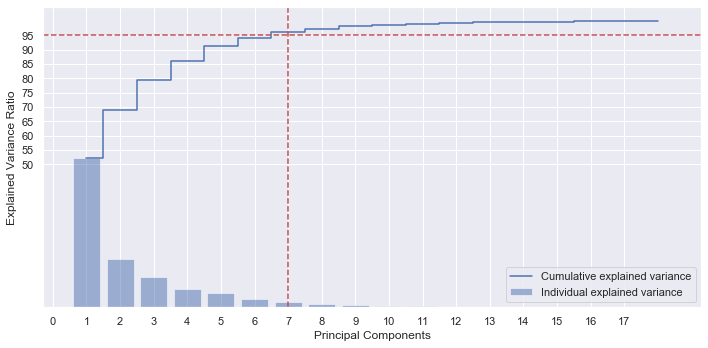

In [39]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))

plt.bar(range(1, pca.explained_variance_.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, pca.explained_variance_.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')

plt.legend(loc = 'best')
plt.axhline(y=95, color='r', linestyle='--')
plt.axvline(x=7, color='r', linestyle='--')


plt.yticks(np.arange(50,100,5))
plt.xticks(np.arange(0,18,1))
plt.tight_layout()
plt.show()

### Observation: 
7 Principal components explain the 95% variation in the dataset. 

<p style="color:blue"><b> STEP7: Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier.<b></p>

In [40]:
def run_pca_extraction(components):
    """ This Function run a PCA extraction with given components, and run a Support vector classifier
     and 10 fold validation.
     
    Return = evaluation scores """
    #run the PCA for given components
    pca = PCA(n_components=components)
    pca.fit(X_scaled)   
    X_scaled_pca= pca.transform(X_scaled)
    
    
    #Split the pca dataset into train and test
    X_pca_train, X_pca_test, y_pca_train, y_pca_test =train_test_split(X_scaled_pca, y, test_size=.30, random_state=10)

    # Building a Support Vector Machine on train data - Use same parameters as earlier
    svc_model = SVC(C= .1, kernel='poly', gamma= 1)
    svc_model.fit(X_pca_train, y_pca_train['class_new'].ravel())
    y_pca_predict= svc_model.predict(X_pca_test)
    
       
    #Kfold cross validation score - using hyperparameters
    pca_score = cross_val_score(SVC(C=.1,kernel = 'poly',gamma=1),X_scaled_pca,y['class_new'].ravel(),
                                scoring = 'accuracy', cv=10)
    X_scaled_pca_temp = add_constant(X_scaled_pca)
    vif = pd.Series([variance_inflation_factor(X_scaled_pca, i) 
               for i in range(X_scaled_pca.shape[1])])
    print('variance inflation factors for {} Component = {}'.format(components, vif.ravel()))
    
    #Evaluation Metrics
    dt_accuracy = accuracy_score(y_pca_test,y_pca_predict)
    train_accuracy = svc_model.score(X_pca_train, y_pca_train)
    dt_f1score = f1_score(y_pca_test,y_pca_predict, average='weighted')
    dt_recall = recall_score(y_pca_test, y_pca_predict, average='weighted')
    dt_precision = precision_score(y_pca_test, y_pca_predict, average='weighted')
    method = 'After PCA - '+str(component)+' Component'
    result= pd.DataFrame({'Method':method,
                                        'Train Accuracy': train_accuracy,
                                        'Test Accuracy':dt_accuracy,
                                        'F1-Score':dt_f1score,
                                        'Recall': dt_recall,
                                        'precision': dt_precision,
                                        '10 fold Mean score': pca_score.mean(),
                                        '10 Fold STD ': pca_score.std()
                                       }, index=[components-6])
    return result
    

In [41]:
#Though 95 variance is explained by 7 components, But I will run the model with components = 7,8 and 9, and 10 
#(variance explained 96.10354875 (7 component)  97.33504945(8 component) 98.22626473(9 component) and 98.735 (10 components) )
for component in [7,8,9,10]:
    result = run_pca_extraction(component)
    final_result = pd.concat([final_result,result])

    
#Print VIF - A value of 1 shows that there is no multicollinerity between the principal components 

variance inflation factors for 7 Component = [1. 1. 1. 1. 1. 1. 1.]
variance inflation factors for 8 Component = [1. 1. 1. 1. 1. 1. 1. 1.]
variance inflation factors for 9 Component = [1. 1. 1. 1. 1. 1. 1. 1. 1.]
variance inflation factors for 10 Component = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Observation:
    
VIF = 1 shows the mulitcollinearity is completely removed post PCA. 

In [42]:
final_result

Method  Train Accuracy  Test Accuracy  F1-Score  \
0  before PCA 18 components        1.000000       0.921260  0.921536   
1   After PCA - 7 Component        0.971284       0.893701  0.893763   
2   After PCA - 8 Component        0.996622       0.889764  0.889608   
3   After PCA - 9 Component        0.998311       0.893701  0.893917   
4  After PCA - 10 Component        0.998311       0.889764  0.890022   

     Recall  precision  10 fold Mean score  10 Fold STD   
0  0.921260   0.923746            0.942503      0.024468  
1  0.893701   0.895137            0.888768      0.029185  
2  0.889764   0.890065            0.918494      0.035834  
3  0.893701   0.896797            0.922024      0.028924  
4  0.889764   0.893209            0.913831      0.037077

### Observation:
1. PCA with 7 component, though explains 95% variation in dataset. But with 7 principal components, there is a dramatic drop in accuracy.
2. Hence I also ran the PCA with 8,9,10 components. 
3. Looking at 10-fold cross validation mean score, with n_components = 9, there is minimum drop in the score. 
4. This shows that after reducing the dimensions (from 18 to 9), there is a minimum sacrifice for accuracy. 

In [43]:
from mlxtend.plotting import plot_decision_regions

In [44]:
pca = PCA(n_components=7)
pca.fit(X_scaled)   
X_scaled_pca= pca.transform(X_scaled)


#Split the pca dataset into train and test
X_pca_train, X_pca_test, y_pca_train, y_pca_test =train_test_split(X_scaled_pca, y, test_size=.30, random_state=10)

C:\Users\spshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


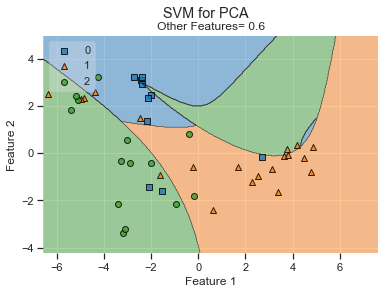

In [45]:
# Plotting the decision boundries - optional
svm = SVC(C= .1, kernel='poly', gamma= 1)
svm.fit(X_pca_train, y_pca_train)

# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = .6
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 1
plot_decision_regions(X_pca_train, y_pca_train.values.ravel(), clf=svm,
                      filler_feature_values={2: value,3:value,4:value,5:value,6:value},
                      filler_feature_ranges={2: width,3:width,4:width,5:width,6:width},
                      zoom_factor=5,
                      legend=2, ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Other Features= {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM for PCA')
plt.show()